# Data Transformation

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

working_path = '/content/drive/My Drive/s182190/data'
os.chdir(working_path)
! pwd
! ls

/content/drive/My Drive/s182190/data
Geolife  interm  MMM_Model_Advance_MMM_data.pt	processed  raw	ROC_6.png  src


## filter by day

In [4]:
# dataset.ts = dataset.ts.dt.round('H')
dataset = pd.read_pickle(f'{working_path}/interm/dataset.pkl')
dataset.ts = dataset.ts.dt.strftime('%Y-%m-%d')
dataset.head(5)

,user,ts,image_ix,x,y,x_web,y_web,label2,labelP,labelM,delta_t,delta_d,bearing,speed,tod,segment_id,segment_ix,segment_point_count,mode,purpose
0,1,2018-06-25,1,1.394209e+06,7.516646e+06,1.394209e+06,7.516646e+06,1,3,0,671.0,7.751420,-1.856730,0.011552,1,1,0,1,-100,Eat Out
1,1,2018-06-25,4,1.394159e+06,7.516558e+06,1.394159e+06,7.516558e+06,2,0,4,72.0,133.415960,-2.005347,1.852999,1,2,0,1,Default,-100
2,1,2018-06-25,5,1.394177e+06,7.516504e+06,1.394177e+06,7.516504e+06,2,0,4,1.0,57.104376,-1.252389,57.104376,1,3,0,1,Default,-100
3,1,2018-06-25,6,1.394163e+06,7.516550e+06,1.394163e+06,7.516550e+06,2,0,4,1.0,47.314571,1.864483,47.314571,1,4,0,606,Default,-100
4,1,2018-06-25,7,1.394156e+06,7.516552e+06,1.394156e+06,7.516552e+06,2,0,4,1.0,7.512082,2.876788,7.512082,1,4,1,606,Default,-100


In [5]:
dataset.user.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# drop days when user have a default mode

filter_list_day = []
for i in dataset.user.unique():
    day_list = dataset[(dataset.user == i) & (dataset.labelM == 4)].ts.unique()
    filter_list_day.append(dataset[(dataset.user == i) & (~dataset.ts.isin(day_list))])
                                  
dataset_filter_by_day = pd.concat(filter_list_day, ignore_index=True)

dataset_filter_by_hour.to_pickle(f'{working_path}/interm/dataset_filter_by_day.pkl')


In [ ]:
dataset_filter_by_day.user.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

the length of total dataset before filter by day is 1468268 

the length of total dataset after filter by day is 185858 

the number of days before filter by day is 60 

the number of days afterfilter by day is 35 

label2  labelM  mode        labelP  purpose    
1       0       -100        0       -100             2289
                            1       Accompany        2152
                            2       Change Mode        65
                            3       Eat Out            20
                            4       Education        1269
                            6       Errands            18
                            8       Home           117381
                            11      Second Home         2
                            12      Shopping           51
                            14      Work            37010
2       1       Air         0       -100             1254
        3       Bus         0       -100            17584
        6       Light Rail  0       -100

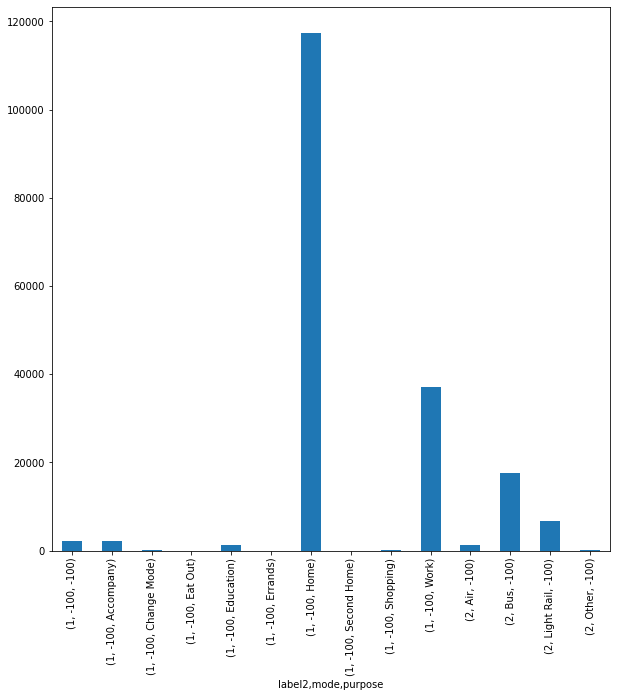

In [ ]:
print(f'the length of total dataset before filter by day is {len(dataset)} \n')
print(f'the length of total dataset after filter by day is {len(dataset_filter_by_day)} \n')

print(f'the number of days before filter by day is {len(dataset.ts.unique())} \n')
print(f'the number of days afterfilter by day is {len(dataset_filter_by_day.ts.unique())} \n')

print(dataset_filter_by_day[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False))


matplotlib.rcParams['figure.figsize'] = [10, 10] # for square canvas


dataset_filter_by_day[['label2', 'mode','purpose']].value_counts(sort = False).plot(kind='bar')

## check the user distribution after filter by day

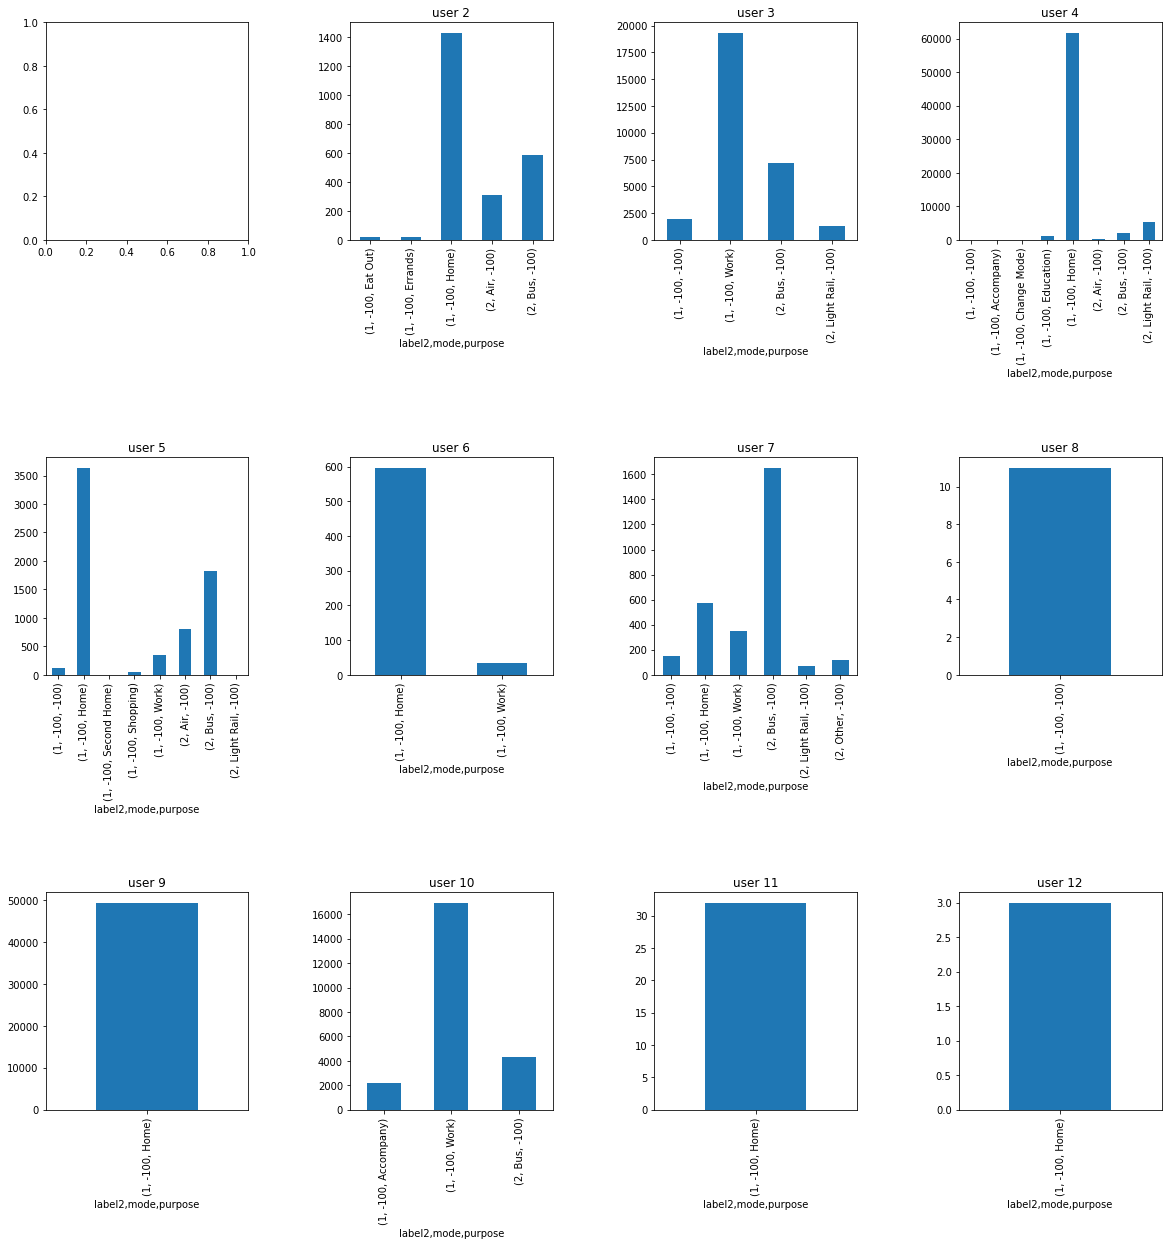

In [ ]:
matplotlib.rcParams['figure.figsize'] = [20, 20] # for square canvas
fig, axes = plt.subplots(3, 4)
plt.subplots_adjust(wspace =0.5, hspace =1)#调整子图间距
# plot counter
for r in range(3):
    for c in range(4):
        if r + c > 0:
            dataset_filter_by_day[['label2','mode','purpose']][dataset_filter_by_day['user'] == (c + 4*r + 1)].value_counts(sort = False).plot(kind='bar',ax=axes[r,c], title = f'user {r*4 + c +1}' )
matplotlib.rcParams['figure.figsize'] = [10, 10]

## filter by hour

In [ ]:
# dataset.ts = dataset.ts.dt.round('H')
dataset = pd.read_pickle(f'{working_path}/interm/dataset.pkl')
dataset.ts = dataset.ts.dt.strftime('%Y-%m-%d-%H')
dataset.head(5)

,user,ts,image_ix,x,y,x_web,y_web,label2,labelP,labelM,delta_t,delta_d,bearing,speed,tod,segment_id,segment_ix,segment_point_count,mode,purpose
0,1,2018-06-25-09,1,1.394209e+06,7.516646e+06,1.394209e+06,7.516646e+06,1,3,0,671.0,7.751420,-1.856730,0.011552,1,1,0,1,-100,Eat Out
1,1,2018-06-25-09,4,1.394159e+06,7.516558e+06,1.394159e+06,7.516558e+06,2,0,4,72.0,133.415960,-2.005347,1.852999,1,2,0,1,Default,-100
2,1,2018-06-25-09,5,1.394177e+06,7.516504e+06,1.394177e+06,7.516504e+06,2,0,4,1.0,57.104376,-1.252389,57.104376,1,3,0,1,Default,-100
3,1,2018-06-25-09,6,1.394163e+06,7.516550e+06,1.394163e+06,7.516550e+06,2,0,4,1.0,47.314571,1.864483,47.314571,1,4,0,606,Default,-100
4,1,2018-06-25-09,7,1.394156e+06,7.516552e+06,1.394156e+06,7.516552e+06,2,0,4,1.0,7.512082,2.876788,7.512082,1,4,1,606,Default,-100


In [ ]:
dataset.user.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# drop hours when user have a default mode

filter_list_hour = []
for i in dataset.user.unique():
    hour_list = dataset[(dataset.user == i) & (dataset.labelM == 4)].ts.unique()
    filter_list_hour.append(dataset[(dataset.user == i) & (~dataset.ts.isin(hour_list))])
                                  
dataset_filter_by_hour = pd.concat(filter_list_hour, ignore_index=True)
dataset_filter_by_hour.to_pickle(f'{working_path}/interm/dataset_filter_by_hour.pkl')


In [ ]:
dataset_filter_by_hour.user.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
dataset_filter_by_hour.head()

,user,ts,image_ix,x,y,x_web,y_web,label2,labelP,labelM,delta_t,delta_d,bearing,speed,tod,segment_id,segment_ix,segment_point_count,mode,purpose
0,1,2018-06-25-11,1483,1.394210e+06,7.516647e+06,1.394210e+06,7.516647e+06,1,3,0,1775.0,7.265090,-1.759773,0.004093,2,10,0,6,-100,Eat Out
1,1,2018-06-25-11,1484,1.394210e+06,7.516647e+06,1.394210e+06,7.516647e+06,1,3,0,1.0,0.000000,0.000000,0.000000,2,10,1,6,-100,Eat Out
2,1,2018-06-25-11,1487,1.394210e+06,7.516643e+06,1.394210e+06,7.516643e+06,1,3,0,41.0,4.633838,-1.749762,0.113020,2,10,2,6,-100,Eat Out
3,1,2018-06-25-11,1488,1.394208e+06,7.516636e+06,1.394208e+06,7.516636e+06,1,3,0,51.0,6.745727,-1.754004,0.132269,2,10,3,6,-100,Eat Out
4,1,2018-06-25-11,1491,1.394211e+06,7.516648e+06,1.394211e+06,7.516648e+06,1,3,0,34.0,10.506570,1.359983,0.309017,2,10,4,6,-100,Eat Out


the length of total dataset before filter by hour is 1468268 

the length of total dataset after filter by hour is 947686 

the number of hours before filter by hour is 1230 

the number of hours afterfilter by hour is 1130 

label2  labelM  mode        labelP  purpose      
1       0       -100        0       -100              99595
                            1       Accompany          7102
                            2       Change Mode        7177
                            3       Eat Out            3316
                            4       Education          9761
                            5       Entertainment        87
                            6       Errands              57
                            7       Exercise            224
                            8       Home             535611
                            9       Medical            1296
                            11      Second Home         105
                            12      Shopping            504
    

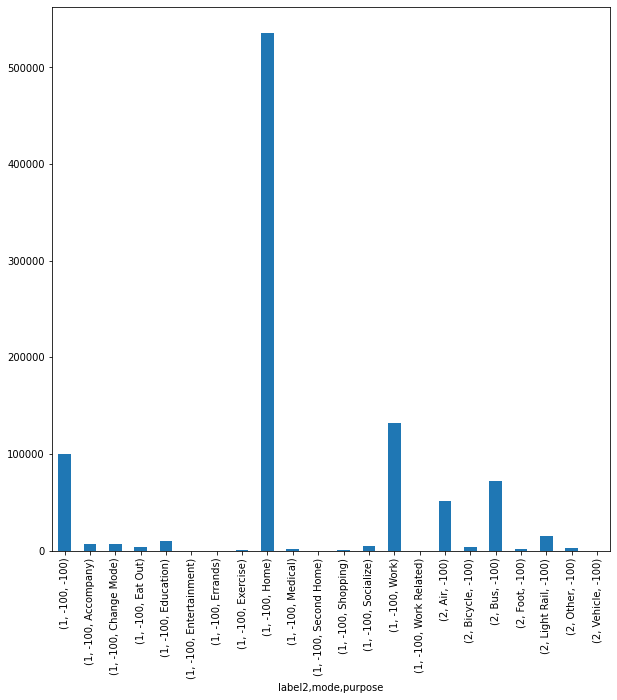

In [ ]:
print(f'the length of total dataset before filter by hour is {len(dataset)} \n')
print(f'the length of total dataset after filter by hour is {len(dataset_filter_by_hour)} \n')

print(f'the number of hours before filter by hour is {len(dataset.ts.unique())} \n')
print(f'the number of hours afterfilter by hour is {len(dataset_filter_by_hour.ts.unique())} \n')

print(dataset_filter_by_hour[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False))


matplotlib.rcParams['figure.figsize'] = [10, 10] # for square canvas

dataset_filter_by_hour[['label2', 'mode','purpose']].value_counts(sort = False).plot(kind='bar')

In [ ]:
pd.DataFrame(dataset_filter_by_hour['label2'].value_counts(sort = False)).head()

,label2
1,801288
2,146398


## check the user distribution after filter by hour

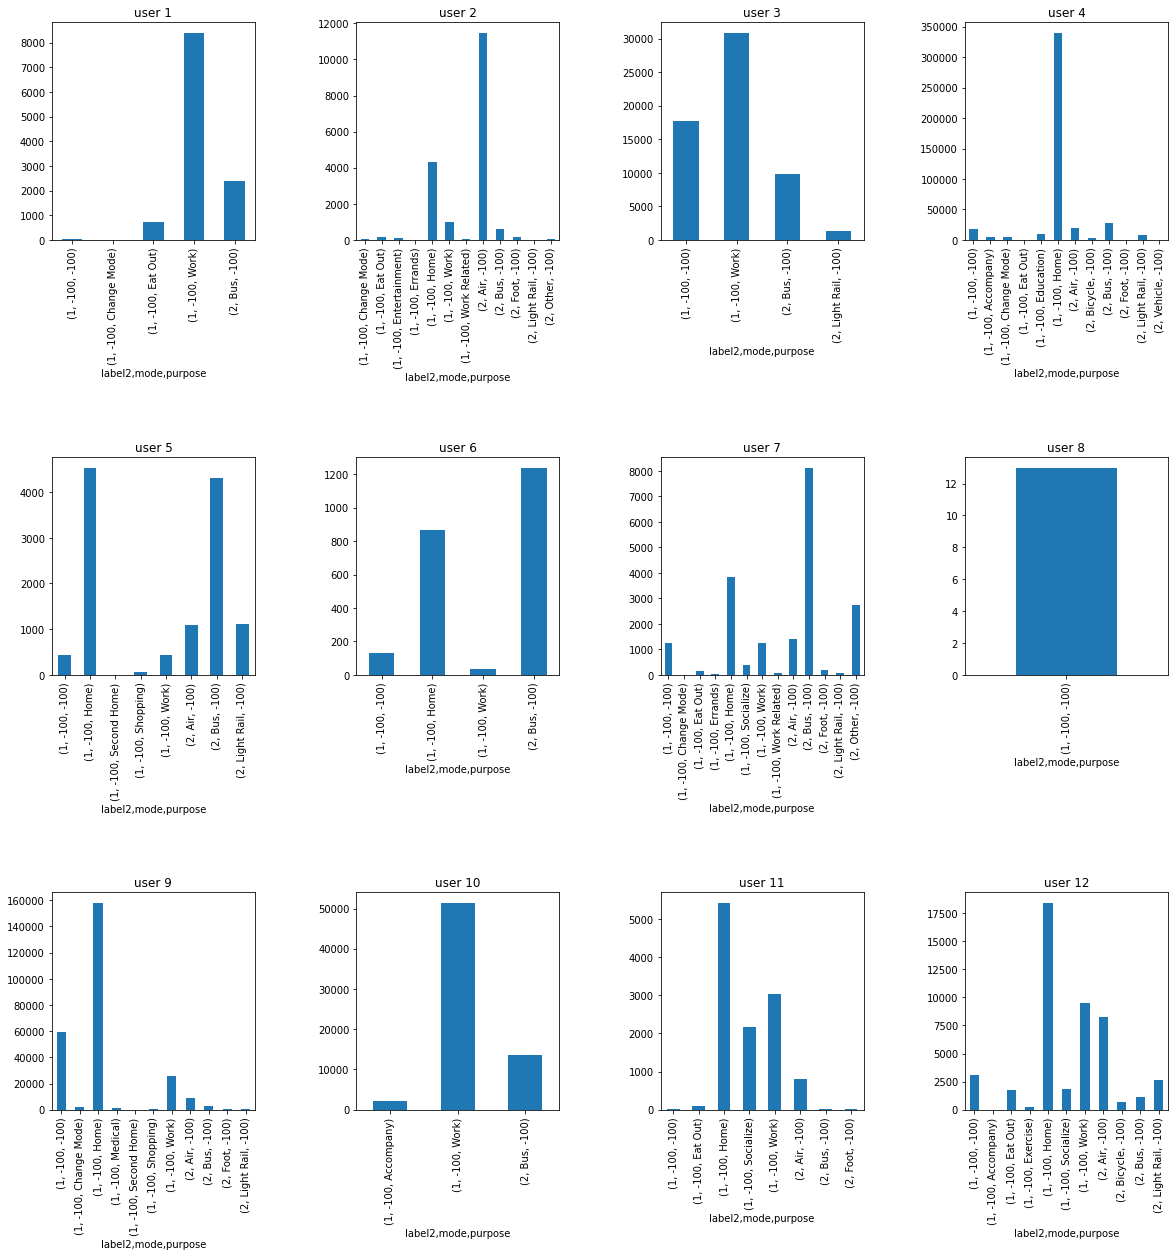

In [ ]:
matplotlib.rcParams['figure.figsize'] = [20, 20] # for square canvas
fig, axes = plt.subplots(3, 4)
plt.subplots_adjust(wspace =0.5, hspace =1)#调整子图间距
# plot counter
for r in range(3):
    for c in range(4):
        dataset_filter_by_hour[['label2','mode','purpose']][dataset_filter_by_hour['user'] == (c + 4*r + 1)].value_counts(sort = False).plot(kind='bar',ax=axes[r,c], title = f'user {r*4 + c +1}' )
matplotlib.rcParams['figure.figsize'] = [10, 10]

## Drop the records with both -100 on mode and purpose

In [12]:
dataset_filter_by_hour = pd.read_pickle(f'{working_path}/interm/dataset_filter_by_hour.pkl')

dataset_filter_by_hour_drop = dataset_filter_by_hour[(dataset_filter_by_hour.labelM != 0) | (dataset_filter_by_hour.labelP != 0)]
print(dataset_filter_by_hour_drop[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False))

dataset_filter_by_hour_drop.to_pickle(f'{working_path}/interm/dataset_filter_by_hour_drop.pkl')


label2  labelM  mode        labelP  purpose      
1       0       -100        1       Accompany          7102
                            2       Change Mode        7177
                            3       Eat Out            3316
                            4       Education          9761
                            5       Entertainment        87
                            6       Errands              57
                            7       Exercise            224
                            8       Home             535611
                            9       Medical            1296
                            11      Second Home         105
                            12      Shopping            504
                            13      Socialize          4365
                            14      Work             131974
                            15      Work Related        114
2       1       Air         0       -100              51456
        2       Bicycle     0       -100          

## Merge classes

Purpose
0. -100
1. Accompany
2. Change Mode
3. Informal
4. Formal
5. Home



Mode
0. -100
1. Mix
2. Bike
3. Bus
4. Walk
5. Light Rail


In [1]:
purpose_names = ["-100", "Accompany", "Change Mode", "Informal", "Formal","Home"]
mode_names = ["-100", "Mix","Bike","Bus","Walk","Light Rail"]

In [23]:
dataset = pd.read_pickle(f'{working_path}/interm/dataset_filter_by_hour_drop.pkl')
dataset[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False)

label2  labelM  mode        labelP  purpose      
1       0       -100        1       Accompany          7102
                            2       Change Mode        7177
                            3       Eat Out            3316
                            4       Education          9761
                            5       Entertainment        87
                            6       Errands              57
                            7       Exercise            224
                            8       Home             535611
                            9       Medical            1296
                            11      Second Home         105
                            12      Shopping            504
                            13      Socialize          4365
                            14      Work             131974
                            15      Work Related        114
2       1       Air         0       -100              51456
        2       Bicycle     0       -100          

In [24]:

# merge classes
dict_labelM = {1:1, 2:2, 3:3, 5:4, 6:5, 7:1, 8:1}
dict_mode = {"Air":"Mix", "Bicycle":"Bike","Bus":"Bus","Foot":"Walk","Light Rail":"Light Rail","Other":"Mix","Vehicle":"Mix"}

dict_labelP = {1:1, 2:2, 3:3, 4:4, 5:3, 6:4, 7:3, 8:5,9:3, 11:5, 12:3,13:3, 14:4, 15:4}
dict_purpose = {"Accompany":"Accompany" , "Change Mode":"Change Mode","Eat Out": "Informal", "Education": "Formal", "Entertainment":"Informal","Errands":"Formal","Exercise":"Informal","Home":"Home","Medical":"Informal","Second Home":"Home", "Shopping":"Informal","Socialize":"Informal","Work":"Formal","Work Related":"Formal"}



In [25]:

dataset['labelM'] = dataset['labelM'].map(dict_labelM).fillna(dataset['labelM'])
dataset['mode'] = dataset['mode'].map(dict_mode).fillna(dataset['mode'])
dataset['labelP'] = dataset['labelP'].map(dict_labelP).fillna(dataset['labelP'])
dataset['purpose'] = dataset['purpose'].map(dict_purpose).fillna(dataset['purpose'])

# drop user
# dataset = dataset[dataset.user == 2]
# dataset.head()
print(dataset[['label2', 'labelM', 'mode', 'labelP','purpose']].value_counts(sort = False))

dataset.to_pickle(f'{working_path}/processed/dataset_merged.pkl')


label2  labelM  mode        labelP  purpose    
1       0.0     -100        1.0     Accompany        7102
                            2.0     Change Mode      7177
                            3.0     Informal         9792
                            4.0     Formal         141906
                            5.0     Home           535716
2       1.0     Mix         0.0     -100            54235
        2.0     Bike        0.0     -100             3893
        3.0     Bus         0.0     -100            72336
        4.0     Walk        0.0     -100             1254
        5.0     Light Rail  0.0     -100            14680
dtype: int64
